# Lab 1 : Regression Linéaire

## Generation de 100 points (données aléatoire)

Nous importons les librairies et les fonction
- **Numpy** : pour manipuler le Dataset comme une matrice
- **Matplotlib.pyplot** : pour visualiser les données
- La fonction make_regression SkLearn : qui permet de simuler des données en générant un nuage de points
- **SGDRegresso**r (qui signifie Stochastic Gradient Descent Regressor) :  qui contient le calcul de la Fonction Coût, des gradients, de l’algorithme de minimisation.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression 
from sklearn.linear_model import SGDRegressor

Pour ce premier code, nous allons générer un tableau de données $(x,y)$ aléatoires. La fonction **make_regression** prend comme arguments le nombre d’échantillons à générer, le nombre de variables et le bruit. Ensuite,  nous retourne deux vecteurs $x$ et $y$.

Pour maitriser l’aléatoire, on écrit la ligne **np.random.seed(0)**. 

In [2]:
np.random.seed(0)

Finalement, pour visualiser les données, on utilise la fonction **plt.scatter$(x, y)$**.

In [3]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)

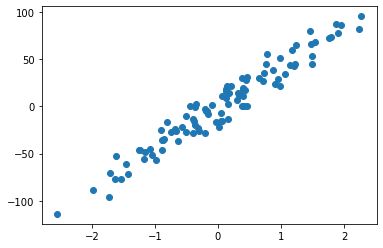

In [5]:
plt.scatter(x, y)

Nous créons le modèle avec $SGDRegressor$ en entrant le nombre d’itérations que le Gradient Descent doit effectuer ainsi que le Learning Rate.
Par exemple, entraînons notre modèle sur 100 itérations avec un Learning rate de 0.0001.

In [6]:
model = SGDRegressor(max_iter=100, eta0=0.0001)

Pour entraîner le modèle, nous utilisons la fonction $fit()$

In [7]:
model.fit(x,y)

C:\Users\romeofr\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(eta0=0.0001, max_iter=100)

$\color{red}{!!!Attention!!!\ La\ fonction\ SGDRegressor,\ nous\ prévient\ par\ un\ warning\ que\ nous\ avons\ mal\ configurer\ notre\ modèle.}$
$\color{red}{ConvergenceWarning:}$ Nombre maximal d'itérations atteint avant la convergence.
Envisager d'augmenter max_iter pour améliorer l'ajustement.

Et ce warning est confirmer par l'observation de la précision du modèle en utilisant la fonction $score$ qui calcule **le coefficient de détermination $(R^2)$**  entre le modèle et les valeurs $y$ de notre Dataset.


In [8]:
print('Coeff R2 =', model.score(x, y))

Coeff R2 = 0.22279377204565387


On peut aussi utiliser notre modèle pour faire de nouvelles prédictions avec la fonction $predict$ et tracer ces résultats avec la fonction $plt.plot$.

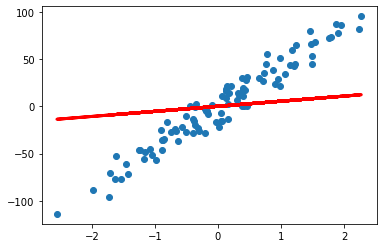

In [9]:
plt.scatter(x, y) 
plt.plot(x, model.predict(x), c='red', lw = 3)

Ce qui confirme que notre modèle semble vraiment mauvais. Cela provient d'un manque d' entraînement du modèle et  le **Learning Rate** est trop faible. 

Il est possible de le ré-entraîner avec de meilleurs hyper-paramètres. En Machine Learning, les valeurs qui fonctionnent bien pour la plupart des entraînements sont :

- **Nombre d’itérations** = 1000
- **Learning Rate** = 0.001

In [12]:
model = SGDRegressor(max_iter=1000, eta0=0.001)
model.fit(x,y)

SGDRegressor(eta0=0.001)

Le message retourné par le fonction confirme le bon choix de nos hyper-paramètres.

Coeff R2 = 0.9416557905990657


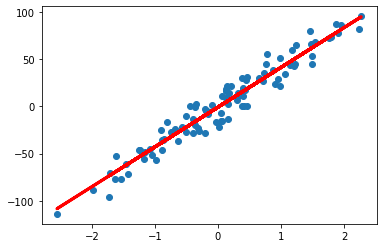

In [13]:
print('Coeff R2 =', model.score(x, y))
plt.scatter(x, y) 
plt.plot(x, model.predict(x), c='red', lw = 3)

Notre modèle fonctionne vraiment bien avec un coefficient $R^2=94$ %. Ce modèle pourrait servir pour faire de bonnes prédictions. Par exemple,  pour prédire le prix d’un appartement selon sa surface habitable, ou bien pour prédire l’évolution de la température sur Terre. 

